In [4]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
# Reading the dataset
India = pd.read_csv('Country-wise_data_testing_information/India_data.csv')
USA = pd.read_csv('Country-wise_data_testing_information/USA_data.csv')
UK = pd.read_csv('Country-wise_data_testing_information/UK_data.csv')
Italy = pd.read_csv('Country-wise_data_testing_information/Italy_data.csv')
Belgium = pd.read_csv('Country-wise_data_testing_information/Belgium_data.csv')
France = pd.read_csv('Country-wise_data_testing_information/France_data.csv')
S_korea = pd.read_csv('Country-wise_data_testing_information/South_Korea_data.csv')

frames = [India, USA, UK, Italy, Belgium, France, S_korea]
data = pd.concat(frames)

#Converting the datatype of dates to datetime
dates = pd.to_datetime(data['dateRep'], format = '%d-%m-%Y')

# Adding dates to the dataframe
data['Date'] = dates

# Removing the original object datatype
# data = data.drop(labels = ['day'], axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 101
Data columns (total 14 columns):
dateRep                     713 non-null object
day                         713 non-null int64
month                       713 non-null int64
year                        713 non-null int64
cases                       713 non-null int64
deaths                      713 non-null int64
countriesAndTerritories     713 non-null object
geoId                       713 non-null object
countryterritoryCode        713 non-null object
popData2018                 713 non-null int64
Daily_total_tests           713 non-null float64
Daily_tests_per_thousand    712 non-null float64
tests_per_thousand          713 non-null float64
Date                        713 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 83.6+ KB


In [7]:
# To separate country-wise data, grouping by Country name
grouped = data.groupby('countriesAndTerritories')

In [8]:
grouped.countriesAndTerritories.unique()

countriesAndTerritories
Belgium                                      [Belgium]
France                                        [France]
India                                          [India]
Italy                                          [Italy]
South_Korea                              [South_Korea]
United_Kingdom                        [United_Kingdom]
United_States_of_America    [United_States_of_America]
Name: countriesAndTerritories, dtype: object

In [9]:
# Dataset Preprocessing before running the model
def dataset_preprocess(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    # Creating different columns with regressor variables
    ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
    df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    df = df.drop(['countriesAndTerritories', 'geoId', 'dateRep', 'countryterritoryCode', 'year'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [10]:
grouped.countriesAndTerritories.unique()

countriesAndTerritories
Belgium                                      [Belgium]
France                                        [France]
India                                          [India]
Italy                                          [Italy]
South_Korea                              [South_Korea]
United_Kingdom                        [United_Kingdom]
United_States_of_America    [United_States_of_America]
Name: countriesAndTerritories, dtype: object

In [11]:
## Isolating the datasets for different countries into different dataframes
India = pd.DataFrame((grouped.get_group('India')))
USA = pd.DataFrame( (grouped.get_group('United_States_of_America'))) 
Italy = pd.DataFrame((grouped.get_group('Italy')))
# Spain = pd.DataFrame((grouped.get_group('Spain')))
# Germany = pd.DataFrame(grouped.get_group('Germany'))
France = pd.DataFrame(grouped.get_group('France'))
# China = pd.DataFrame(grouped.get_group('China'))
S_korea = pd.DataFrame(grouped.get_group('South_Korea'))
UK = pd.DataFrame(grouped.get_group('United_Kingdom'))
Belgium = pd.DataFrame(grouped.get_group('Belgium'))

In [12]:
# Preprocessing Datasets
UK_updated = dataset_preprocess(UK)
Belgium_updated  = dataset_preprocess(Belgium)
USA_updated = dataset_preprocess(USA)
Italy_updated = dataset_preprocess(Italy)
# Spain_updated = dataset_preprocess(Spain)
# Germany_updated = dataset_preprocess(Germany)
France_updated = dataset_preprocess(France)
# China_updated = dataset_preprocess(China)
S_korea_updated = dataset_preprocess(S_korea)
India_updated = dataset_preprocess(India)

In [13]:
#df_filtered = USA_updated[USA_updated['cases'] > 0] 

In [14]:
India_updated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2019-12-31 to 2020-04-09
Data columns (total 9 columns):
day                         100 non-null int64
month                       100 non-null int64
cases                       100 non-null int64
deaths                      100 non-null int64
popData2018                 100 non-null int64
Daily_total_tests           100 non-null float64
Daily_tests_per_thousand    100 non-null float64
tests_per_thousand          100 non-null float64
Weekday                     100 non-null int64
dtypes: float64(3), int64(6)
memory usage: 7.8 KB


In [15]:
# Plotting the Confirmed Cases with Date
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, label):
    sns.set(rc = {'figure.figsize':(11,4)})
    df[label].plot(linewidth = 3, color = 'purple')

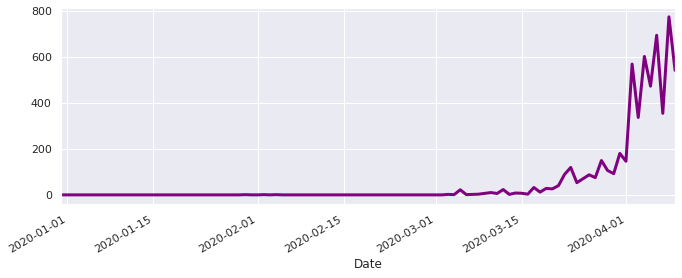

In [16]:
plot_data(India_updated, 'cases')

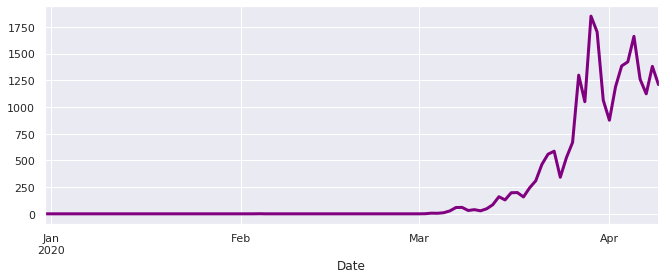

In [17]:
plot_data(Belgium_updated, 'cases')

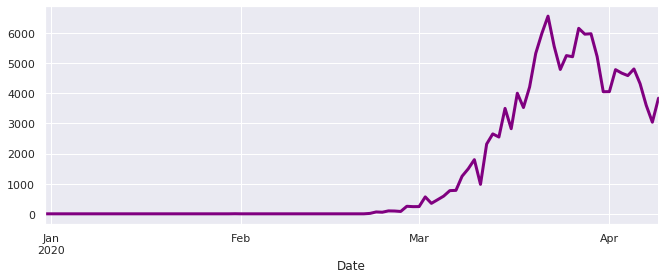

In [18]:
plot_data(Italy_updated, 'cases')

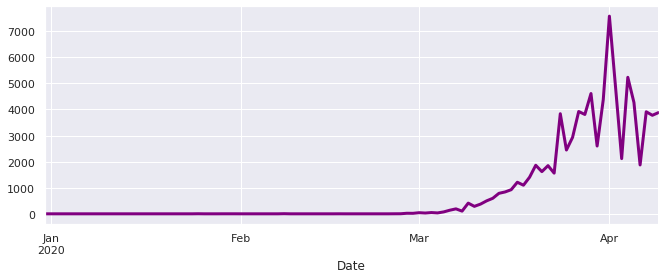

In [19]:
plot_data(France_updated, 'cases')

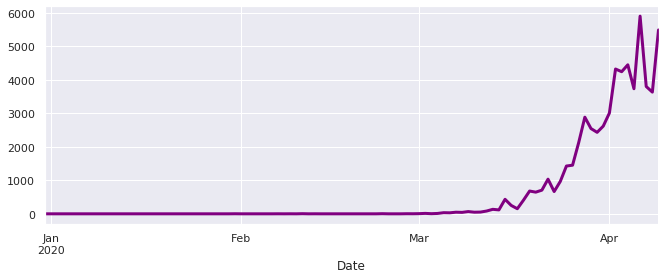

In [20]:
# plot_data(Germany_updated, 'cases')
plot_data(UK_updated, 'cases')

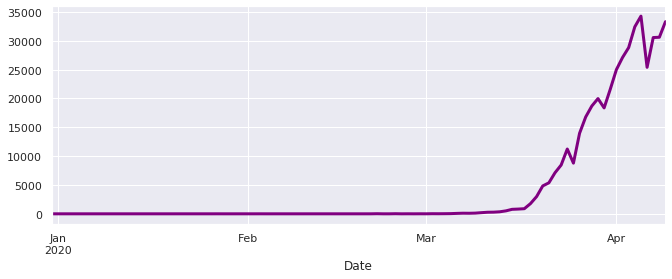

In [21]:
plot_data(USA_updated, 'cases')

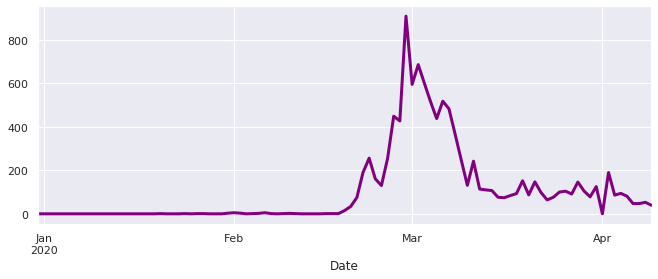

In [22]:
plot_data(S_korea_updated, 'cases')

In [23]:
USA_updated.head()

,day,month,cases,deaths,popData2018,Daily_total_tests,Daily_tests_per_thousand,tests_per_thousand,Weekday
Date,,,,,,,,,
2019-12-31,31,12,0,0,327167434,0.0,0.0,0.0,1
2020-01-01,1,1,0,0,327167434,0.0,0.0,0.0,2
2020-01-02,2,1,0,0,327167434,0.0,0.0,0.0,3
2020-01-03,3,1,0,0,327167434,0.0,0.0,0.0,4
2020-01-04,4,1,0,0,327167434,0.0,0.0,0.0,5


In [24]:
# Train test split
expr1 = """ cases ~ day + month + Weekday   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
expr2 = """cases ~ day + month + Weekday + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests"""
expr3 = """cases ~ day + month + Weekday + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests + popData2018"""


def train_test_split(df,ratio, expr):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    print('Training data set length='+str(len(df_train)))
    print('Testing data set length='+str(len(df_test)))
    
#     # Expression for the Model 
#     expr1 = """ cases cases ~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr2 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr3 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests + popData2018"""

    ## Matrix Formation
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    return X_train, y_train, X_test, y_test

def train_model(y_train, X_train):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    print(model.summary())
    return(model)

def predict(model, X_test):
    poisson_predictions = model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    print(predictions_summary_frame)
    return(predictions_summary_frame)
    
    
def plot_results(predictions_summary_frame,X_test, y_test, country, label):
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test[label]
    fig = plt.figure()
    fig.suptitle(str('Predicted Mean of Covid 19 Cofirmed Cases Count'))
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()
    return(predicted_counts, actual_counts)
    
def plot_actual_vs_output(predicted_counts, actual_counts):
    plt.clf()
    fig = plt.figure()
    fig.suptitle('Scatter plot of Actual versus Predicted counts')
    plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
    plt.xlabel('Predicted counts')
    plt.ylabel('Actual counts')
    plt.show()

## INDIA MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

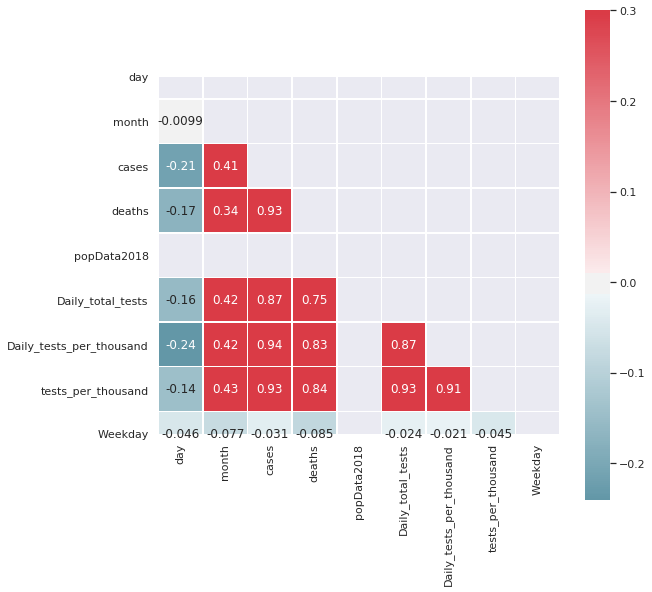

In [25]:
# Compute the correlation matrix
corr = India_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [77]:
df_filtered = India_updated[India_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,1, expr2) 

Training data set length=40
Testing data set length=0


### STEP 2: MODEL TRAINING AND SUMMARY

In [78]:
model_India = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   40
Model:                            GLM   Df Residuals:                       33
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -435.12
Date:                Sat, 18 Apr 2020   Deviance:                       659.84
Time:                        04:32:11   Pearson chi2:                     913.
No. Iterations:                     7   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -14.5181      0.630    -23.038      0.000     -15.753     -13.283
day       

### STEP 3: PREDICTIONS

In [79]:
predictions_frame = predict(model_India, X_train)

                  mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                           
2020-01-30    0.007646   0.002280       0.004262       0.013715
2020-02-02    0.017858   0.005064       0.010244       0.031130
2020-02-04    0.021535   0.005892       0.012597       0.036817
2020-03-03    2.815802   0.336153       2.228358       3.558109
2020-03-04    3.353930   0.377101       2.690597       4.180800
2020-03-05    3.993611   0.423109       3.244771       4.915271
2020-03-06    4.758225   0.475703       3.911525       5.788204
2020-03-07    5.667403   0.536406       4.707821       6.822575
2020-03-08    6.750303   0.607989       5.657921       8.053592
2020-03-10    8.139648   0.662587       6.939301       9.547628
2020-03-11    9.695642   0.721538       8.379753      11.218168
2020-03-12   11.545528   0.786578      10.102359      13.194861
2020-03-13   13.183847   0.863031      11.596354      14.988662
2020-03-14   17.150735   1.031878      1

### STEP 4: PLOTTING THE RESULTS

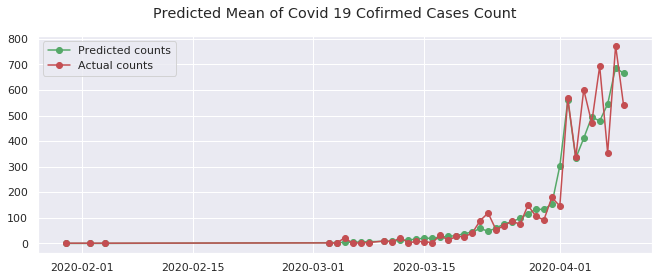

0.007645760814448151 1.0
0.01785778163045265 1.0
0.021535475411521506 1.0
2.8158023639359056 2.0
3.3539302479202546 1.0
3.9936111670845906 22.0
4.758225319479523 1.0
5.66740336731602 2.0
6.750302638332884 3.0
8.139647935384742 10.0
9.69564226311545 6.0
11.545528257944799 23.0
13.183847367554863 2.0
17.150734657014873 8.0
20.20056682888009 7.0
20.225509349236685 3.0
25.115378373375922 32.0
27.351383846831908 12.0
30.588646542200763 28.0
37.89393311259636 26.0
44.579723140839214 40.0
58.44681087840731 89.0
47.635374018262844 119.0
59.77083754550586 53.0
76.36627059571038 70.0
84.78236123885412 87.0
98.75109880335833 75.0
115.02132486493652 149.0
133.97223255236656 106.0
132.64387535506575 92.0
154.49827357303582 180.0
303.11201674522505 146.0
560.4008996065232 568.0
333.40326524563613 336.0
411.3685588514118 601.0
494.404559333332 472.0
478.764801523914 693.0
545.0742331682405 354.0
687.3835083424406 773.0
665.1428419623805 540.0


In [82]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_train, y_train, India, 'cases')
for i in range(len(predicted_counts.index)): 
    print(predicted_counts[i], actual_counts[i])

## USA MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

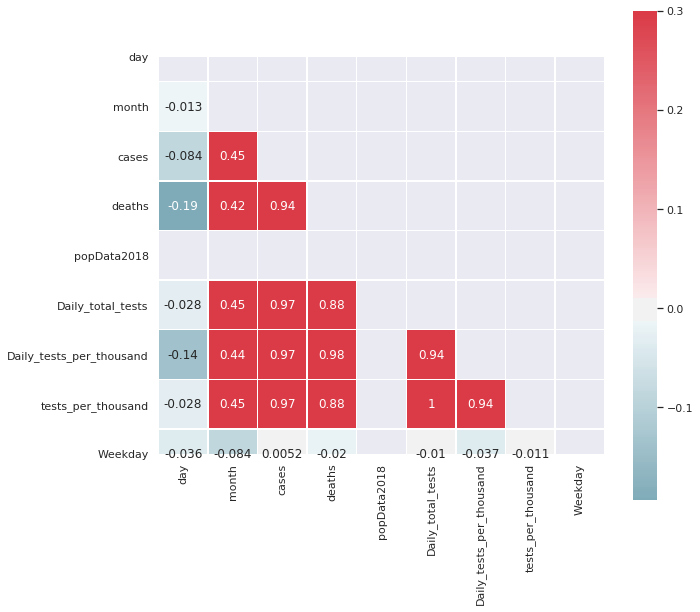

In [85]:
# Compute the correlation matrix
corr = USA_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [86]:
df_filtered = USA_updated[USA_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr2) 

Training data set length=41
Testing data set length=16


### STEP 2: MODEL TRAINING AND SUMMARY

In [87]:
model_USA = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   41
Model:                            GLM   Df Residuals:                       34
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1672.3
Date:                Sat, 18 Apr 2020   Deviance:                       3024.7
Time:                        04:40:13   Pearson chi2:                 8.08e+04
No. Iterations:                     9   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -27.3917      0.171   -160.562      0.000     -27.726     -27.057
day       

### STEP 3: PREDICTIONS

In [88]:
predictions_frame = predict(model_USA, X_train)

                    mean     mean_se  mean_ci_lower  mean_ci_upper
Date                                                              
2020-01-27      0.000124    0.000010       0.000105       0.000146
2020-01-31      0.000515    0.000040       0.000442       0.000600
2020-02-01      0.000699    0.000053       0.000602       0.000811
2020-02-02      0.000997    0.000074       0.000862       0.001154
2020-02-06      0.003181    0.000217       0.002783       0.003636
2020-02-11      0.014477    0.000879       0.012853       0.016306
2020-02-21      0.389832    0.018023       0.356060       0.426807
2020-02-22      0.552585    0.024817       0.506023       0.603431
2020-02-25      1.235644    0.049567       1.142216       1.336714
2020-02-29      5.140104    0.178359       4.802150       5.501842
2020-03-01     13.117226    0.390631      12.373519      13.905634
2020-03-02     14.447803    0.403645      13.677944      15.260993
2020-03-03     20.359042    0.537858      19.331687      21.44

### STEP 4: PLOTTING THE RESULTS

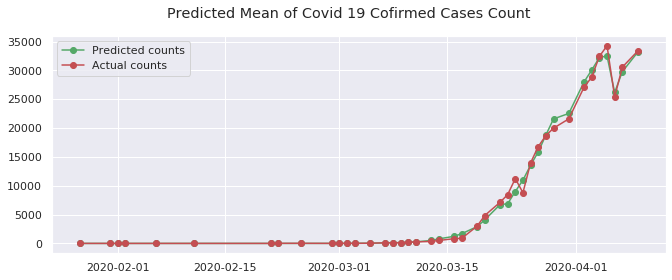

In [89]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_train, y_train, USA, 'cases')

## UK MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

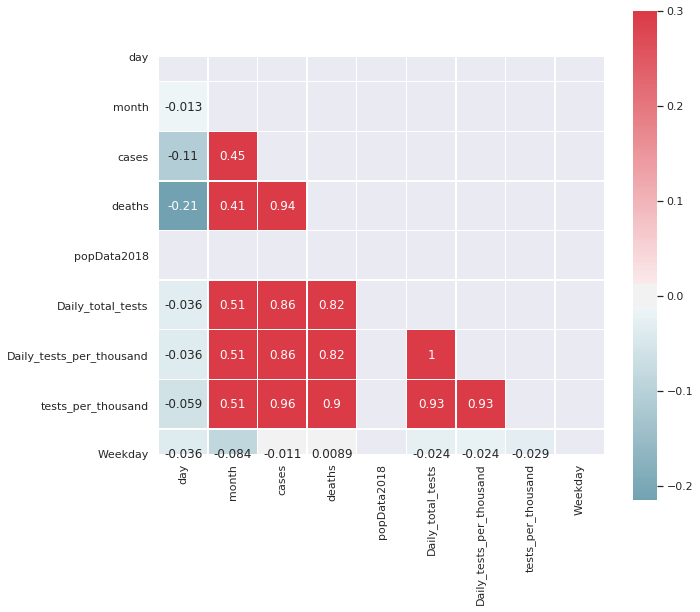

In [91]:
# Compute the correlation matrix
corr = UK_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [96]:
df_filtered = UK_updated[UK_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr2) 

Training data set length=35
Testing data set length=13


### STEP 2: MODEL TRAINING AND SUMMARY

In [97]:
model_UK = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   35
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.59
Date:                Sat, 18 Apr 2020   Deviance:                       751.43
Time:                        04:49:52   Pearson chi2:                 2.51e+03
No. Iterations:                     9   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -21.6696      0.443    -48.896      0.000     -22.538     -20.801
day       

### STEP 3: PREDICTIONS

In [98]:
predictions_frame = predict(model_UK, X_train)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-31     0.002672   0.000498       0.001854       0.003852
2020-02-09     0.030647   0.004542       0.022921       0.040976
2020-02-11     0.053568   0.007511       0.040696       0.070511
2020-02-13     0.075760   0.010109       0.058326       0.098404
2020-02-24     1.202683   0.108407       1.007920       1.435081
2020-02-28     3.215072   0.241271       2.775321       3.724501
2020-03-01     9.416879   0.571610       8.360623      10.606581
2020-03-02    11.467037   0.687556      10.195621      12.897001
2020-03-03    15.250474   0.829642      13.708093      16.966397
2020-03-04    21.246471   1.079795      19.232102      23.471825
2020-03-05    22.498513   1.087682      20.464579      24.734596
2020-03-06    27.012915   1.251248      24.668542      29.580086
2020-03-07    37.638369   1.556253      34.708491      40.815569
2020-03-09    52.645059  

### STEP 4: PLOTTING THE RESULTS

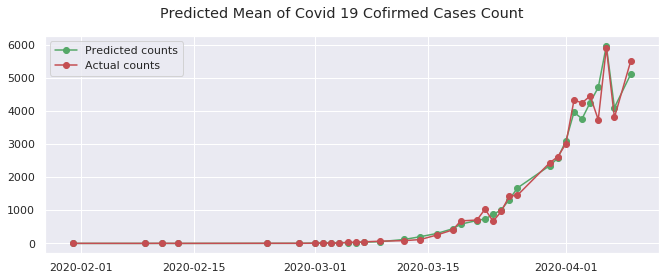

In [99]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_train, y_train, UK, 'cases')

## South Korea MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

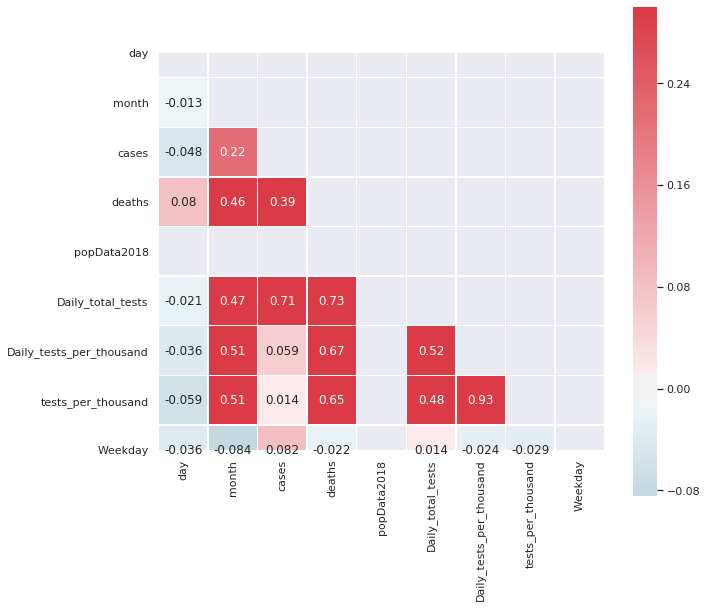

In [37]:
# Compute the correlation matrix
corr = S_korea_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [1]:
df_filtered = S_korea_updated[S_korea_updated['Daily_total_tests'] > 15000] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,1, expr1) 

NameError: name 'S_korea_updated' is not defined

#### STEP 2: MODEL TRAINING AND SUMMARY

In [106]:
model_S_Korea = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   27
Model:                            GLM   Df Residuals:                       23
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -719.07
Date:                Sat, 18 Apr 2020   Deviance:                       1251.8
Time:                        05:22:40   Pearson chi2:                 1.21e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4208      0.127     97.557      0.000      12.171      12.670
day           -0.0783      0.002    -43.766      0.0

### STEP 3: PREDICTIONS

In [107]:
predictions_frame = predict(model_S_Korea, X_train)

                  mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                           
2020-02-27  596.644767  13.843015     570.120607     624.402932
2020-02-28  570.730325  12.960997     545.884285     596.707237
2020-02-29  545.941440  13.116036     520.830330     572.263248
2020-03-01  677.531308  18.130158     642.912610     714.014108
2020-03-02  511.370462  13.938820     484.767817     539.432983
2020-03-03  489.159791  10.783192     468.475191     510.757679
2020-03-04  467.913811   8.277765     451.967738     484.422484
2020-03-06  428.150138   6.337908     415.906540     440.754167
2020-03-07  409.554028   7.073336     395.922560     423.654822
2020-03-08  391.765613   8.415948     375.613089     408.612747
2020-03-10  282.844473   5.378194     272.497411     293.584425
2020-03-11  270.559513   4.060183     262.717591     278.635511
2020-03-12  258.808134   3.402970     252.223644     265.564517
2020-03-13  247.567160   3.541341     24

### STEP 4: PLOTTING THE RESULTS

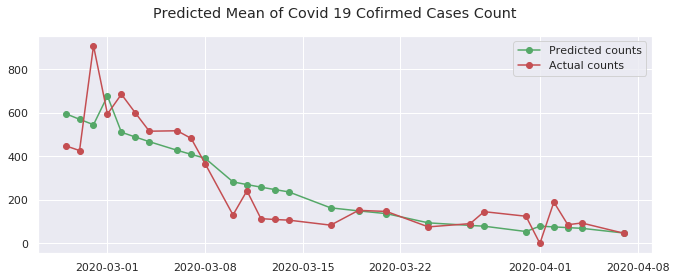

In [108]:
predicted_counts, actual_counts = plot_results(predictions_frame, X_train, y_train, S_korea, 'cases')

## ITALY MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

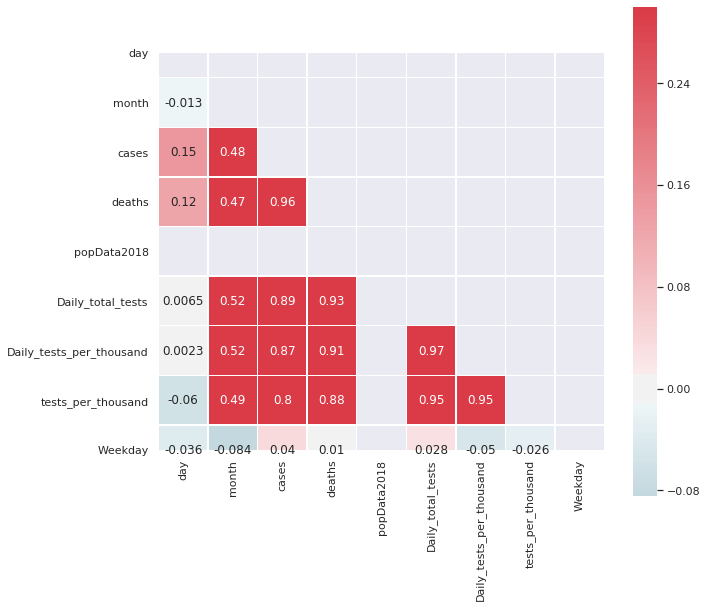

In [42]:
# Compute the correlation matrix
corr = Italy_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [43]:
df_filtered = Italy_updated[Italy_updated['cases'] > 0 ] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr3) 

Training data set length=37
Testing data set length=12


### STEP 2: MODEL TRAINING AND SUMMARY

In [44]:
model_Italy = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   37
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.8
Date:                Fri, 17 Apr 2020   Deviance:                       1864.7
Time:                        23:17:37   Pearson chi2:                 1.81e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3.734e-16   1.94e-17    -19.243      0.000   -4.11e-16   -3.35e-16
day       

### STEP 3: PREDICTIONS

In [45]:
predictions_frame = predict(model_Italy, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-31     0.408617   0.028902       0.355720       0.469379
2020-02-27   121.091984   3.098516     115.168776     127.319826
2020-03-03   437.844421   5.643213     426.922457     449.045801
2020-03-07  1069.445927  10.921410    1048.253156    1091.067156
2020-03-12  2094.656364  12.915158    2069.495457    2120.123177
2020-03-14  2893.791300  23.288382    2848.505003    2939.797570
2020-03-15  3412.817617  24.679021    3364.788787    3461.532009
2020-03-21  5145.839547  34.379823    5078.895595    5213.665875
2020-03-25  5253.749849  43.797301    5168.606194    5340.296096
2020-03-26  5368.680968  48.465604    5274.525556    5464.517147
2020-04-03  4594.965212  29.160725    4538.165224    4652.476114
2020-04-09  2750.562099  31.393604    2689.714883    2812.785811


### STEP 4: PLOTTING THE RESULTS

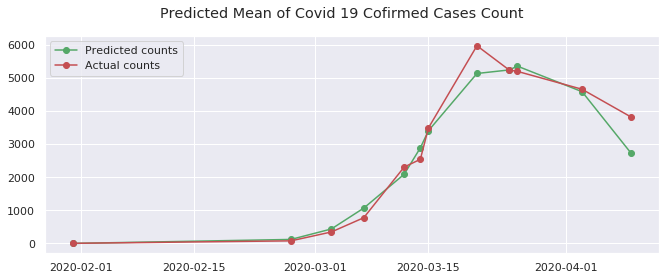

(Date
 2020-01-31       0.408617
 2020-02-27     121.091984
 2020-03-03     437.844421
 2020-03-07    1069.445927
 2020-03-12    2094.656364
 2020-03-14    2893.791300
 2020-03-15    3412.817617
 2020-03-21    5145.839547
 2020-03-25    5253.749849
 2020-03-26    5368.680968
 2020-04-03    4594.965212
 2020-04-09    2750.562099
 Name: mean, dtype: float64, Date
 2020-01-31       3.0
 2020-02-27      78.0
 2020-03-03     347.0
 2020-03-07     778.0
 2020-03-12    2313.0
 2020-03-14    2547.0
 2020-03-15    3497.0
 2020-03-21    5986.0
 2020-03-25    5249.0
 2020-03-26    5210.0
 2020-04-03    4668.0
 2020-04-09    3836.0
 Name: cases, dtype: float64)

In [46]:
plot_results(predictions_frame, y_test, Italy, 'cases')

## FRANCE MODEL: Poisson Regression for confirmed Cases Count

## Correlation Plot

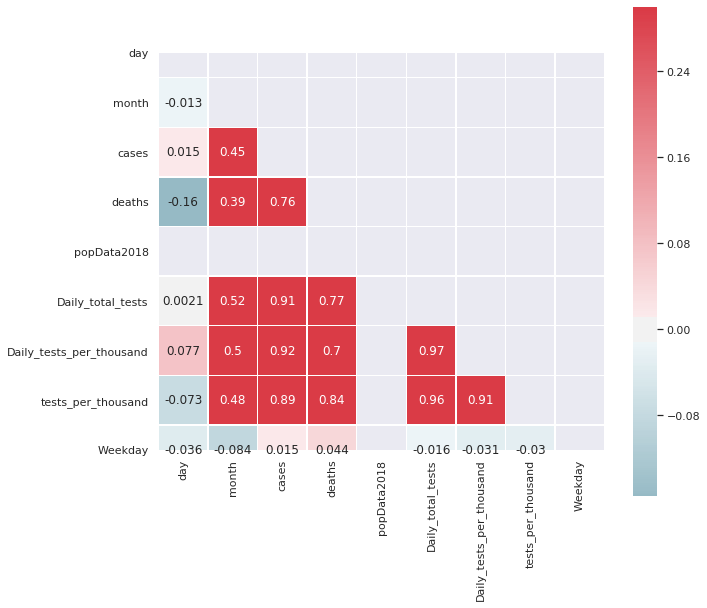

In [47]:
# Compute the correlation matrix
corr = France_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [48]:
df_filtered = France_updated[France_updated['cases'] > 0 ] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr2) 

Training data set length=43
Testing data set length=7


### STEP 2: MODEL TRAINING AND SUMMARY

In [49]:
model_France = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   43
Model:                            GLM   Df Residuals:                       36
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.6
Date:                Fri, 17 Apr 2020   Deviance:                       5428.3
Time:                        23:17:39   Pearson chi2:                 1.69e+04
No. Iterations:                    10   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -21.9128      1.003    -21.842      0.000     -23.879     -19.946
day       

### STEP 3: PREDICTIONS

In [50]:
predictions_frame = predict(model_France, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-02-26     4.541438   0.450624       3.738806       5.516375
2020-03-16   929.689962  10.057960     910.184253     949.613687
2020-03-18  1193.565495  10.365856    1173.420728    1214.056098
2020-03-19  1352.273191  11.730429    1329.476317    1375.460969
2020-03-25  3949.980861  34.328723    3883.267602    4017.840231
2020-03-27  3782.623907  28.966314    3726.274900    3839.825027
2020-03-31  2328.629941  26.171817    2277.894978    2380.494911


### STEP 4: PLOTTING THE RESULTS

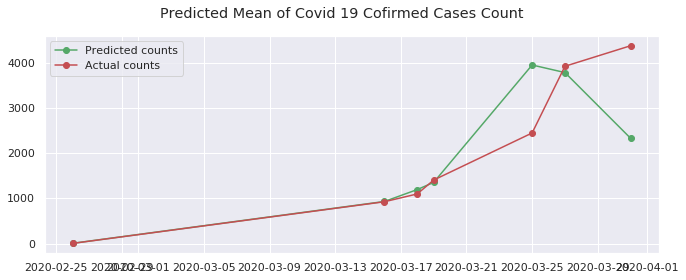

(Date
 2020-02-26       4.541438
 2020-03-16     929.689962
 2020-03-18    1193.565495
 2020-03-19    1352.273191
 2020-03-25    3949.980861
 2020-03-27    3782.623907
 2020-03-31    2328.629941
 Name: mean, dtype: float64, Date
 2020-02-26       2.0
 2020-03-16     924.0
 2020-03-18    1097.0
 2020-03-19    1404.0
 2020-03-25    2446.0
 2020-03-27    3922.0
 2020-03-31    4376.0
 Name: cases, dtype: float64)

In [51]:
plot_results(predictions_frame, y_test, France, 'cases')